In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Open the final DataFrame
file_bici = "bdcompleta_usos_bicimad.csv"
df_usos_bicimad = pd.read_csv(file_bici, encoding='utf-8', sep=',', on_bad_lines='skip', skip_blank_lines=True)

In [40]:
numero_filas_completo = len(df_usos_bicimad)
print("Cantidad de registros cargados (usos bicimad por usuario):")
print(numero_filas_completo)

Cantidad de registros cargados (usos bicimad por usuario):
19541580


In [ ]:
# Identificar estaciones con idunplug_station igual a 0 o mayor a 270
condicion_unplug = (df_usos_bicimad['idunplug_station'] == 0) | (df_usos_bicimad['idunplug_station'] > 270)
estaciones_unplug_problema = df_usos_bicimad.loc[condicion_unplug, 'idunplug_station'].unique()

# Identificar estaciones con idplug_station igual a 0 o mayor a 270
condicion_plug = (df_usos_bicimad['idplug_station'] == 0) | (df_usos_bicimad['idplug_station'] > 270)
estaciones_plug_problema = df_usos_bicimad.loc[condicion_plug, 'idplug_station'].unique()

# Unir las listas de IDs únicos de ambas columnas y eliminar duplicados
estaciones_problema_total = pd.Series(
    list(estaciones_unplug_problema) + list(estaciones_plug_problema)
).unique()

print("Estaciones problemáticas encontradas (igual a 0 o mayor a 270):")
print(estaciones_problema_total)

# Opcional: Contar cuántos registros de cada columna cumplen la condición
count_unplug_problema = df_usos_bicimad[condicion_unplug].shape[0]
count_plug_problema = df_usos_bicimad[condicion_plug].shape[0]

print(f"\nNúmero de registros con 'idunplug_station' problemático: {count_unplug_problema}")
print(f"Número de registros con 'idplug_station' problemático: {count_plug_problema}")

Estaciones problemáticas encontradas (igual a 0 o mayor a 270):
[2008. 2009.  273.  271.  272.    0.  507.  505.  501.  506.  503.  504.
  508.  502.  889. 3000. 2340. 1320. 1640. 1720. 1400. 1650. 1840. 1190.
 2060. 1580. 1260.  640. 1490. 2030. 1130. 1860.  740.  730. 1280. 1600.
 1310. 1000.  960. 2080.  390.  660. 1150.  360. 1670.  610. 2200.  630.
 1290. 1020.  710. 1940. 2040.  580. 2500.  840. 1980. 2320.  760. 2640.
  560.  510.  550. 1360. 2240. 1500. 2310.  480. 1800. 2360. 1060. 1550.
  320. 1210. 1790. 2430.  490.  590. 1700.  770. 2400.  620. 1830.  900.
 1850. 1140. 1330.  670.  500.  780. 1530. 2330. 1630. 1680. 2180.  790.
  750.  570. 1930. 1750. 2410. 1390.  930.  830. 1870.  350. 1220. 1660.
  540. 1690.  520.  380. 1820.  870. 1910.  720.  650. 1200. 1740. 2000.
 1900. 1920. 2390. 2350. 1450.  420. 1170. 2010. 1610. 1710. 1440.  460.
  430. 1760. 2130.  440.  290. 1420.  800.  470. 1880. 2140. 1270.  860.
 2420. 1810.  950.  810. 1040. 1730. 2440.  330. 1410.  690.

Como primer analsis encontramos alguos id de estaciones que no se encuntran mapeadas en el archivo de Bicimad, estas estaciones se trataran posteriormente. Ahora se revisara la variable de tiempo de recorrido

In [ ]:
# Asegurarse de que la columna travel_time sea numérica
df_usos_bicimad['travel_time'] = pd.to_numeric(df_usos_bicimad['travel_time'], errors='coerce')

df_cleaned = df_usos_bicimad.dropna(subset=['travel_time'])

# Calcular el valor mínimo pero mayor a cero
min_valor_mayor_cero = df_cleaned[df_cleaned['travel_time'] >= 0]['travel_time'].min()

# Calcular el valor máximo
max_valor = df_cleaned['travel_time'].max()

print(f"Valor mínimo de travel_time: {min_valor_mayor_cero} minutos")
print(f"Valor máximo de travel_time: {max_valor} minutos")

Valor mínimo de travel_time: 0.0 minutos
Valor máximo de travel_time: 321214.82 minutos


In [ ]:
# Asegurarse de que la columna travel_time sea numérica
df_usos_bicimad['travel_time'] = pd.to_numeric(df_usos_bicimad['travel_time'], errors='coerce')

df_cleaned_for_counts = df_usos_bicimad.dropna(subset=['travel_time']).copy()

# --- 1. Contar registros con travel_time igual a cero ---
registros_tiempo_cero = df_cleaned_for_counts[df_cleaned_for_counts['travel_time'] == 0].shape[0]
print(f"Número de registros con 'travel_time' igual a 0:")
print(f"Total de registros encontrados: {registros_tiempo_cero} minutos")

# --- 2. Definir umbrales en segundos ---
UMBRAL_2_HORAS_MINUTOS = 2 * 60   # 120 minutos
UMBRAL_15_HORAS_MINUTOS = 15 * 60 # 900 minutos

# --- 3. Contar registros entre 2 horas y 15 horas ---
registros_entre_2h_y_15h = df_cleaned_for_counts[
    (df_cleaned_for_counts['travel_time'] > UMBRAL_2_HORAS_MINUTOS) &
    (df_cleaned_for_counts['travel_time'] <= UMBRAL_15_HORAS_MINUTOS)
].shape[0]
print(f"\nNúmero de registros con 'travel_time' entre 2 horas ({UMBRAL_2_HORAS_MINUTOS}s) y 15 horas ({UMBRAL_15_HORAS_MINUTOS}s):" )
print(f"Total de registros encontrados: {registros_entre_2h_y_15h} minutos")

# --- 4. Obtener el listado de registros mayores a 15 horas ---
registros_mayores_15h = df_cleaned_for_counts[df_cleaned_for_counts['travel_time'] > UMBRAL_15_HORAS_MINUTOS].copy()

print(f"\nNúmero de registros con 'travel_time' mayor a 15 horas ({UMBRAL_15_HORAS_MINUTOS} minutos):")

if not registros_mayores_15h.empty:
    print(f"Total de registros encontrados: {registros_mayores_15h.shape[0]} minutos")
else:
    print("No se encontraron registros con 'travel_time' mayor a 15 horas.")

Número de registros con 'travel_time' igual a 0:
Total de registros encontrados: 382 minutos

Número de registros con 'travel_time' entre 2 horas (120s) y 15 horas (900s):
Total de registros encontrados: 101759 minutos

Número de registros con 'travel_time' mayor a 15 horas (900 minutos):
Total de registros encontrados: 32089 minutos


In [ ]:
# Asegurarse de que la columna travel_time sea numérica
df_usos_bicimad['travel_time'] = pd.to_numeric(df_usos_bicimad['travel_time'], errors='coerce')

df_cleaned = df_usos_bicimad.dropna(subset=['travel_time'])

# Nuevo filtro: Excluir registros mayores a 15 horas
UMBRAL_15_HORAS_SEGUNDOS = 15 * 60 # 900 minutos

# Filtrar valores de travel_time mayores a cero Y menores o iguales a 24 horas
df_valid_and_reasonable_times = df_cleaned[
    (df_cleaned['travel_time'] >= 0) &
    (df_cleaned['travel_time'] <= UMBRAL_15_HORAS_SEGUNDOS)
].copy()

# --- Cálculos Estadísticos ---

# Valor mínimo (mayor a cero y <= 24h)
min_valor_mayor_cero = df_valid_and_reasonable_times['travel_time'].min()
# Valor máximo (<= 24h)
max_valor = df_valid_and_reasonable_times['travel_time'].max()
# Media (promedio)
media_travel_time = df_valid_and_reasonable_times['travel_time'].mean()
# Mediana (valor central)
mediana_travel_time = df_valid_and_reasonable_times['travel_time'].median()
# Moda (valor(es) más frecuente(s))
moda_travel_time = df_valid_and_reasonable_times['travel_time'].mode()
# Desviación estándar
std_travel_time = df_valid_and_reasonable_times['travel_time'].std()
# Desviación estándar positiva más 3
umbral_std_mas_3 = media_travel_time + (3 * std_travel_time)

# --- Impresión de Resultados ---
print(f"**Análisis de 'travel_time' (viajes >= 0 minutos y <= 15 horas):**")
print(f"------------------------------------------------------------------")

if not df_valid_and_reasonable_times.empty:
    print(f"Valor mínimo (mayor o igual a cero y <= 15h): {min_valor_mayor_cero:.2f} minutos ")
    print(f"Valor máximo (<= 15h): {max_valor:.2f} minutos")
    print(f"Media (promedio): {media_travel_time:.2f} minutos")
    print(f"Mediana: {mediana_travel_time:.2f} minutos")
    print(f"Moda(s): {moda_travel_time.tolist()} minutos")
    print(f"Desviación estándar: {std_travel_time:.2f} minutos")
    print(f"Umbral superior: {umbral_std_mas_3:.2f} minutos")
else:
    print("No hay registros válidos para realizar el análisis después de aplicar los filtros.")
    print("Verifica tu DataFrame y los valores en la columna 'travel_time'.")

**Análisis de 'travel_time' (viajes >= 0 minutos y <= 15 horas):**
------------------------------------------------------------------
Valor mínimo (mayor o igual a cero y <= 15h): 0.00 minutos 
Valor máximo (<= 15h): 899.77 minutos
Media (promedio): 15.37 minutos
Mediana: 11.42 minutos
Moda(s): [0.22] minutos
Desviación estándar: 19.48 minutos
Umbral superior: 73.82 minutos


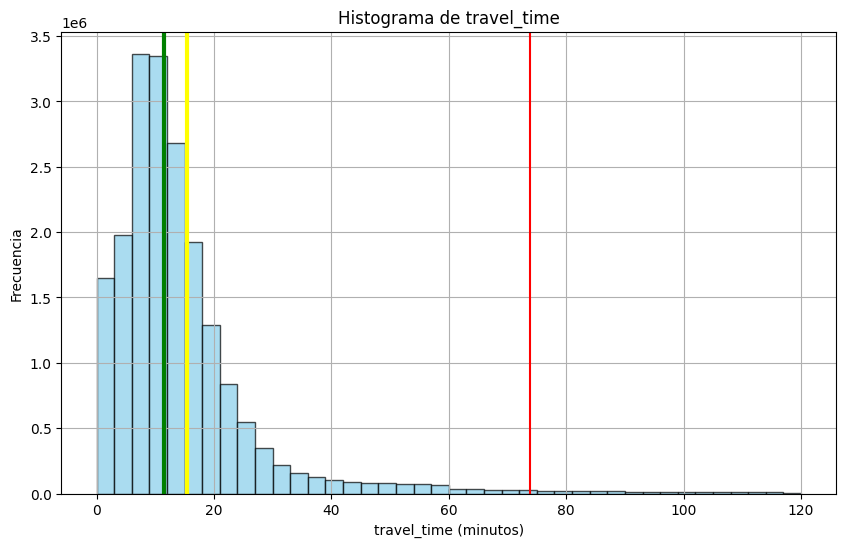

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_usos_bicimad['travel_time'], bins=40, range=(0, 120), color='skyblue', edgecolor='black', alpha=0.7) # Alpha para hacer el azul más suave
plt.title('Histograma de travel_time')
plt.xlabel('travel_time (minutos)')
plt.ylabel('Frecuencia')

# Aumentar el grosor de las líneas amarilla y verde
plt.axvline(umbral_std_mas_3, color='red', linewidth=1.5) # linewidth para el grosor
plt.axvline(media_travel_time, color='yellow', linewidth=3) # más marcado
plt.axvline(mediana_travel_time, color='green', linewidth=3) # más marcado

plt.grid(True)
plt.show()

In [ ]:
# Tu condición original: idunplug_station es igual a idplug_station
condicion_estaciones_iguales = (df_usos_bicimad['idunplug_station'] == df_usos_bicimad['idplug_station'])

# Nueva condición: travel_time es menor a 5 minutos
condicion_travel_time = (df_usos_bicimad['travel_time'] < 5)

# Combinar ambas condiciones con & (AND lógico)
coinciden_y_travel_time_menor = df_usos_bicimad[condicion_estaciones_iguales & condicion_travel_time]


In [ ]:
num_filas_coinciden_y_travel_time_menor = len(coinciden_y_travel_time_menor)
print("Registros Anomalías/Atípicos (desenganche/enganche misma estación y menor a  minutos):")
print(num_filas_coinciden_y_travel_time_menor)

Registros Anomalías/Atípicos (desenganche/enganche menor a 4 minutos):
1416319


Se revisan los registros donde el travel_time es menor a 5 minutos, y que el desenganche y enganche fuese en el mismo punto, ya que estos errores se conocen como resistros no positivos

In [ ]:
# Tu condición original: idunplug_station es igual a idplug_station
condicion_estaciones_iguales = (df_usos_bicimad['idunplug_station'] == df_usos_bicimad['idplug_station'])

# Nueva condición: travel_time es menor a 250
condicion_travel_time = (df_usos_bicimad['travel_time'] < 5)

# Combinar ambas condiciones con & (AND lógico) para identificar las filas A ELIMINAR
condicion_a_eliminar = condicion_estaciones_iguales & condicion_travel_time

# Eliminar las filas que cumplen la condición invirtiendo la selección
df_usos_bicimad = df_usos_bicimad[~condicion_a_eliminar].copy()

Se trtaron 1 millon 400 mil registros que presentaban la condicion de ser desenganchadas y enganchadas las bicicletas en el mismo punto, y con un tiempo menor a 5 minutos.

In [31]:
num_filas_coinciden_y_travel_time_menor = len(df_usos_bicimad)
print("Registros tratados (desenganche/enganche misma estación y menor a 4 minutos):")
print(num_filas_coinciden_y_travel_time_menor)

Registros tratados (desenganche/enganche misma estación y menor a 4 minutos):
18125261


In [ ]:
# Asegurarse de que la columna travel_time sea numérica
df_usos_bicimad['travel_time'] = pd.to_numeric(df_usos_bicimad['travel_time'], errors='coerce')

# Contar los registros donde travel_time es mayor a 7200 segundos
registros_largos = df_usos_bicimad[df_usos_bicimad['travel_time'] > 120].shape[0]

print(f"Número de registros con 'travel_time' mayor a 120 minutos (2 horas):")
print(registros_largos)

Número de registros con 'travel_time' mayor a 120 segundos (2 horas):
133848


Aunque existen registros donde el tiempo es menor a 2 minutos entre distintas estaciones, procedemos a dejarlas asumiendo que ha sido un error en el registro del campo , siendo alrededor de unos 130 mil registros con estos casos

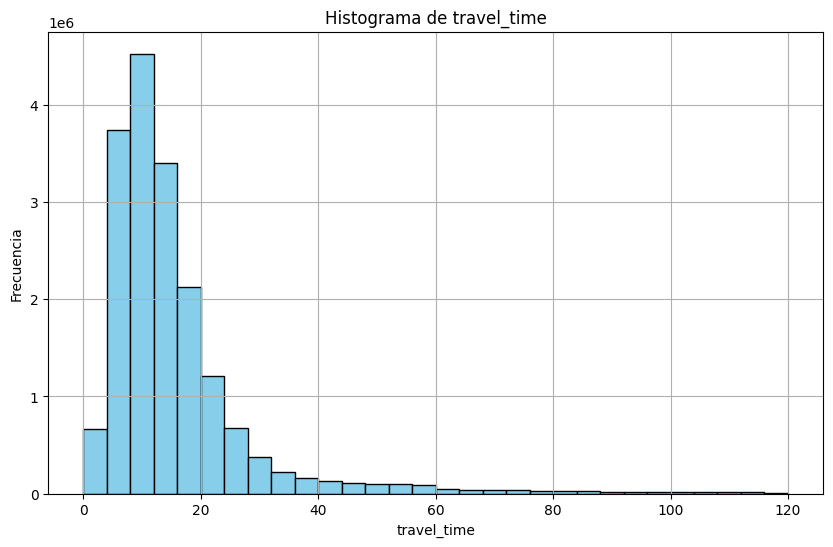

In [ ]:


plt.figure(figsize=(10, 6))
plt.hist(df_usos_bicimad['travel_time'].dropna(), bins=30, range=(0, 120),color='skyblue', edgecolor='black')
plt.title('Histograma de travel_time')
plt.xlabel('travel_time')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

A partir de este punto se realizará una modificación al dataset conforme a como lo necesitamos para el modelo. Aqui se genera un registro por estacion y fecha teniendo en cuenta la cantidad de bicicletas desenganchadas y enganchadas por hora

In [ ]:
df_original = df_usos_bicimad.copy()

# Asegúrate de que unplug_hour sea un tipo datetime
df_original['unplug_hourTime'] = pd.to_datetime(df_original['unplug_hourTime'])

# Estaciones problemáticas
estaciones_problematica = [0] + list(range(272, 3000))

# --- Paso 1: Crear el DataFrame de eventos ---

# Eventos de desenganche
df_unplug_events = df_original[['idunplug_station', 'unplug_hourTime']].copy()
df_unplug_events = df_unplug_events.rename(columns={'idunplug_station': 'station_id', 'unplug_hourTime': 'timestamp'})
df_unplug_events['event_type'] = 'unplug'
df_unplug_events_filtered = df_unplug_events[~df_unplug_events['station_id'].isin(estaciones_problematica)].copy()

# Eventos de enganche (estimando la hora de llegada)
# Convertir travel_time a timedelta si no lo está
df_original['travel_time_td'] = pd.to_timedelta(df_original['travel_time'], unit='s')
df_original['plug_hour'] = df_original['unplug_hourTime'] + df_original['travel_time_td']

df_plug_events = df_original[['idplug_station', 'plug_hour']].copy()
df_plug_events = df_plug_events.rename(columns={'idplug_station': 'station_id', 'plug_hour': 'timestamp'})
df_plug_events['event_type'] = 'plug'
df_plug_events_filtered = df_plug_events[~df_plug_events['station_id'].isin(estaciones_problematica)].copy()
df_plug_events_filtered.dropna(inplace=True)
df_plug_events_filtered['station_id'] = df_plug_events_filtered['station_id'].astype(int) # Pasar columna station_id a entero

# Concatenar ambos dataframes de eventos
df_events_filtered = pd.concat([df_unplug_events_filtered, df_plug_events_filtered], ignore_index=True)

# --- Paso 2: Extraer fecha y hora y agrupar ---

df_events_filtered['date'] = df_events_filtered['timestamp'].dt.date
df_events_filtered['hour'] = df_events_filtered['timestamp'].dt.hour

df_agg = df_events_filtered.groupby(['station_id', 'date', 'hour', 'event_type']).size().unstack(fill_value=0).reset_index()

df_agg = df_agg.rename(columns={
    'plug': 'cant_plug_hora',
    'unplug': 'cant_unplug_hora'
})

df_agg = df_agg[['station_id', 'date', 'hour', 'cant_unplug_hora', 'cant_plug_hora']]

In [9]:
df_agg.head()


event_type,station_id,date,hour,cant_unplug_hora,cant_plug_hora
0,1,2018-01-01,4,0,1
1,1,2018-01-01,7,0,1
2,1,2018-01-01,8,2,0
3,1,2018-01-01,9,0,1
4,1,2018-01-01,10,0,8


In [39]:
cantidad_registros_agrupados = len(df_agg)
print("cantidad de registros tratados por estación y agrupados por cantidad por hora:")
print(cantidad_registros_agrupados)


cantidad de registros tratados por estación y agrupados por cantidad por hora:
6982141


In [ ]:
# Asegúrate de que la columna 'date' en df_agg sea de tipo datetime de pandas
df_agg['date'] = pd.to_datetime(df_agg['date'])

# 1. Extraer directamente los componentes de fecha/hora como NUMEROS ENTEROS.
df_agg['dia'] = df_agg['date'].dt.day.astype(pd.Int8Dtype())
df_agg['mes'] = df_agg['date'].dt.month.astype(pd.Int8Dtype())
df_agg['año'] = df_agg['date'].dt.year.astype(pd.Int16Dtype())
df_agg['dia_semana'] = df_agg['date'].dt.dayofweek.astype(pd.Int8Dtype())

df_agg = df_agg.rename(columns={
    'cantidad_enganchadas_hora': 'cant_plug_hora',
    'cantidad_desenganchadas_hora': 'cant_unplug_hora'
})

# Pasar columna station_id a entero
df_agg['station_id'] = df_agg['station_id'].astype(int)
# Pasar columna station_id a entero
df_agg['hour'] = df_agg['hour'].astype(int)

df_agg.head()

event_type,station_id,date,hour,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana
0,1,2018-01-01,4,0,1,1,1,2018,0
1,1,2018-01-01,7,0,1,1,1,2018,0
2,1,2018-01-01,8,2,0,1,1,2018,0
3,1,2018-01-01,9,0,1,1,1,2018,0
4,1,2018-01-01,10,0,8,1,1,2018,0


In [ ]:
# Cargar el archivo estaciones_bicimad_meteo2
ruta_base2 = 'datos/estaciones_bicimad_meteo_15_05.csv'
estaciones_df = pd.read_csv(ruta_base2, delimiter=';')
estaciones_df.head()

# Lista de las columnas a modificar
columnas_a_modificar = [
    'E. Temp. Código 1', 'E. Temp. Código 2', 'E. Temp. Código 3',
    'E. Prec. Código 1', 'E. Prec. Código 2'
]

# Modificar cada columna
for col in columnas_a_modificar:
    # Asegurarse de que la columna existe en el DataFrame antes de intentar modificarla
    if col in estaciones_df.columns:
        # Reemplaza los primeros 4 dígitos (^\d{4}) por una cadena vacía.
        estaciones_df[col] = pd.to_numeric(estaciones_df[col].astype(str).str[4:8], errors='coerce').astype(pd.Int64Dtype())

# Agregar sufijo '_83' a los valores en las columnas que empiecen por 'E. Temp.' y 'E. Prec.'
for col in estaciones_df.columns:
    if col.startswith('E. Temp.'):
        #estaciones_df[col] = estaciones_df[col].astype(str) + '_83'
        estaciones_df[col] = estaciones_df[col].astype(str).str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') + '_83'
    elif col.startswith('E. Prec.'):
        #estaciones_df[col] = estaciones_df[col].astype(str) + '_89'
        estaciones_df[col] = estaciones_df[col].astype(str).str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') + '_89'

estaciones_df['id'] = estaciones_df['id'].astype(str).str.strip()

In [ ]:
# Identificar las columnas que comienzan con 'E. Temp.' o 'E. Prec.'
temp_prec_columns = [col for col in estaciones_df.columns if col.startswith('E. Temp.') or col.startswith('E. Prec.')]

# Realizar el merge basado en 'station_id'
unplug_columns = ['id'] + temp_prec_columns

# Ensure the merge key columns have the same data type
df_agg['station_id'] = df_agg['station_id'].astype(str).str.strip()
estaciones_df['id'] = estaciones_df['id'].astype(str).str.strip()

# Perform the merge
basedatos_df = pd.merge(df_agg, estaciones_df[unplug_columns],
                        left_on='station_id', right_on='id', how='left')

basedatos_df.drop(columns=['id'], inplace=True)


In [18]:
# Display the first few rows of the merged DataFrame
print("Merged DataFrame head:")
display(basedatos_df.head())

Merged DataFrame head:


,station_id,date,hour,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana,E. Temp. Código 1,E. Temp. Código 2,E. Temp. Código 3,E. Prec. Código 1,E. Prec. Código 2
0,1,2018-01-01,4,0,1,1,1,2018,0,9035_83,9110_83,9004_83,9056_89,9024_89
1,1,2018-01-01,7,0,1,1,1,2018,0,9035_83,9110_83,9004_83,9056_89,9024_89
2,1,2018-01-01,8,2,0,1,1,2018,0,9035_83,9110_83,9004_83,9056_89,9024_89
3,1,2018-01-01,9,0,1,1,1,2018,0,9035_83,9110_83,9004_83,9056_89,9024_89
4,1,2018-01-01,10,0,8,1,1,2018,0,9035_83,9110_83,9004_83,9056_89,9024_89


In [21]:
# --- CÓDIGO PARA AÑADIR FECHA Y HORA ---
for col in estaciones_df.columns:
    if col.startswith('E. Temp.') or col.startswith('E. Prec.'):
        # Asegurarse de que el valor actual sea string y formatear la fecha y hora
        date_str = basedatos_df['date'].dt.strftime('%d-%m-%Y') # Formato DD-MM-YYYY
        hour_str = basedatos_df['hour'].astype(str).str.zfill(2) # Asegura formato 00, 01, etc.

        # Concatenar el valor actual con la fecha y hora
        basedatos_df[col] = basedatos_df[col].astype(str) + '-' + date_str + '-' + hour_str + ':00'
basedatos_df.head()

,station_id,date,hour,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana,E. Temp. Código 1,E. Temp. Código 2,E. Temp. Código 3,E. Prec. Código 1,E. Prec. Código 2
0,1,2018-01-01,4,0,1,1,1,2018,0,9035_83-01-01-2018-04:00,9110_83-01-01-2018-04:00,9004_83-01-01-2018-04:00,9056_89-01-01-2018-04:00,9024_89-01-01-2018-04:00
1,1,2018-01-01,7,0,1,1,1,2018,0,9035_83-01-01-2018-07:00,9110_83-01-01-2018-07:00,9004_83-01-01-2018-07:00,9056_89-01-01-2018-07:00,9024_89-01-01-2018-07:00
2,1,2018-01-01,8,2,0,1,1,2018,0,9035_83-01-01-2018-08:00,9110_83-01-01-2018-08:00,9004_83-01-01-2018-08:00,9056_89-01-01-2018-08:00,9024_89-01-01-2018-08:00
3,1,2018-01-01,9,0,1,1,1,2018,0,9035_83-01-01-2018-09:00,9110_83-01-01-2018-09:00,9004_83-01-01-2018-09:00,9056_89-01-01-2018-09:00,9024_89-01-01-2018-09:00
4,1,2018-01-01,10,0,8,1,1,2018,0,9035_83-01-01-2018-10:00,9110_83-01-01-2018-10:00,9004_83-01-01-2018-10:00,9056_89-01-01-2018-10:00,9024_89-01-01-2018-10:00


In [ ]:
# Cargar archivo CSV consolidado_metereologico
consolidado_metereologico = pd.read_csv('datos\consolidado_metereologico_completo.csv', delimiter=';')

# Asegurar formato dos dígitos en DIA y MES
consolidado_metereologico['DIA'] = consolidado_metereologico['DIA'].astype(str).str.zfill(2)
consolidado_metereologico['MES'] = consolidado_metereologico['MES'].astype(str).str.zfill(2)

# Ajustar el formato de la hora: '24:00' a '00:00'
consolidado_metereologico['HORA'] = consolidado_metereologico['HORA'].astype(str).replace('24:00', '00:00')

# --- Creación de 'Clave Muestreo' con la transformación en línea de PUNTO_MUESTREO ---
consolidado_metereologico.insert(
    0,  # posición al inicio
    'Clave Muestreo',
    (
        consolidado_metereologico['PUNTO_MUESTREO']
        .astype(str)       # Asegura que sea string para las operaciones de texto
        #.str.split('_').str[0] # Elimina lo que está después del guion bajo ('_83')
        .str[4:]           # Elimina los primeros 4 dígitos ('2807')
        #.astype(float)     # Convierte a float (ej. '9102' -> 9102.0)
        .astype(str)       # Vuelve a convertir a string para la concatenación, manteniendo el '.0'
        + '-' +
        consolidado_metereologico['DIA'].astype(str) + '-' +
        consolidado_metereologico['MES'].astype(str) + '-' +
        consolidado_metereologico['ANO'].astype(str) + '-' +
        consolidado_metereologico['HORA'].astype(str)
    )
)

# consolidado_metereologico.head(5) # Puedes descomentar para verificar el resultado
consolidado_metereologico.head(5) # Puedes descomentar para verificar

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ProjectSupport\AppData\Local\Temp\ipykernel_23212\2693405501.py:4: SyntaxWarning: invalid escape sequence '\c'
  consolidado_metereologico = pd.read_csv('datos\consolidado_metereologico_completo.csv', delimiter=';')


,Clave Muestreo,PUNTO_MUESTREO,ANO,MES,DIA,HORA,VALOR,VERIF
0,9004_83-31-12-2017-00:00,28079004_83,2017,12,31,00:00,5.0,V
1,9004_83-01-01-2018-01:00,28079004_83,2018,01,01,01:00,4.0,V
2,9004_83-01-01-2018-02:00,28079004_83,2018,01,01,02:00,4.0,V
3,9004_83-01-01-2018-03:00,28079004_83,2018,01,01,03:00,3.0,V
4,9004_83-01-01-2018-04:00,28079004_83,2018,01,01,04:00,3.0,V


In [ ]:
# 1. Limpieza de claves en 'consolidado_metereologico'
consolidado_metereologico['Clave Muestreo'] = consolidado_metereologico['Clave Muestreo'].astype(str).str.strip()
# consolidado_metereologico['Clave Muestreo'] = consolidado_metereologico['Clave Muestreo'].str.upper() # o .str.lower()

# 2. Preparar listas de columnas por tipo
temp_cols = [col for col in basedatos_df.columns if 'E. Temp. Código' in col]
prec_cols = [col for col in basedatos_df.columns if 'E. Prec. Código' in col]

# 3. Función para consolidar valores de múltiples columnas
def consolidar_valores(df_base, columnas_fuente, df_mapeo, col_clave_mapeo, col_valor_mapeo):
    # Melt el DataFrame base para tener todas las claves en una sola columna temporal
    # Esto manejará eficientemente la búsqueda en múltiples columnas
    df_temp = df_base[['station_id', 'date', 'hour'] + columnas_fuente].melt(
        id_vars=['station_id', 'date', 'hour'],
        value_vars=columnas_fuente,
        var_name='col_origen',
        value_name='clave_busqueda'
    ).dropna(subset=['clave_busqueda']) # Elimina las filas donde la clave es nula

    # Limpiar las claves en df_temp también
    df_temp['clave_busqueda'] = df_temp['clave_busqueda'].astype(str).str.strip()
    # Si aplicaste .upper()/.lower() antes, hazlo aquí también
    # df_temp['clave_busqueda'] = df_temp['clave_busqueda'].str.upper()

    # Realizar el merge (left join) para traer los valores
    df_merged = pd.merge(df_temp, df_mapeo[[col_clave_mapeo, col_valor_mapeo]],
                         left_on='clave_busqueda',
                         right_on=col_clave_mapeo,
                         how='left')

    # Agrupar por las claves originales de basedatos_df y tomar el primer valor no nulo
    # Esto simula el "combine_first" pero de forma más robusta
    df_final = df_merged.groupby(['station_id', 'date', 'hour'])[col_valor_mapeo].first().reset_index()
    return df_final.rename(columns={col_valor_mapeo: 'Valor_Consolidado'}) # Renombra temporalmente

# 4. Consolidar valores de Temperatura
valores_temp = consolidar_valores(basedatos_df, temp_cols, consolidado_metereologico, 'Clave Muestreo', 'VALOR')
basedatos_df = pd.merge(basedatos_df, valores_temp, on=['station_id', 'date', 'hour'], how='left')
basedatos_df.rename(columns={'Valor_Consolidado': 'Valor_Temp'}, inplace=True)

# 5. Consolidar valores de Precipitación
valores_prec = consolidar_valores(basedatos_df, prec_cols, consolidado_metereologico, 'Clave Muestreo', 'VALOR')
basedatos_df = pd.merge(basedatos_df, valores_prec, on=['station_id', 'date', 'hour'], how='left')
basedatos_df.rename(columns={'Valor_Consolidado': 'Valor_Prec'}, inplace=True)

# 6. Eliminar las columnas originales de códigos
columnas_a_eliminar = temp_cols + prec_cols
basedatos_df.drop(columns=columnas_a_eliminar, inplace=True)

In [25]:
basedatos_df.head()

,station_id,date,hour,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana,Valor_Temp,Valor_Prec
0,1,2018-01-01,4,0,1,1,1,2018,0,6.0,0.0
1,1,2018-01-01,7,0,1,1,1,2018,0,5.0,0.0
2,1,2018-01-01,8,2,0,1,1,2018,0,5.0,0.0
3,1,2018-01-01,9,0,1,1,1,2018,0,5.0,0.0
4,1,2018-01-01,10,0,8,1,1,2018,0,5.0,0.0


In [35]:
# validar nulos df estaciones_df
basedatos_df.isnull().sum()

station_id          0
date                0
hour                0
cant_unplug_hora    0
cant_plug_hora      0
dia                 0
mes                 0
año                 0
dia_semana          0
Valor_Temp          0
Valor_Prec          0
dtype: int64

In [ ]:
fechas_especiales_df = pd.read_excel('datos/Fechas especiales.xlsx')
basedatos_df.rename(columns={'es_dia_especial': 'dia_especial'}, inplace=True)

# --- Paso 1: Asegurarse de que las columnas de fecha estén en formato datetime ---
# Convertir 'Fecha' en fechas_especiales_df a datetime
fechas_especiales_df['Fecha'] = pd.to_datetime(fechas_especiales_df['Fecha'])

# Crear una columna de fecha en basedatos_df para la unión/comparación
# Usar un diccionario para mapear los nombres de tus columnas
# 'year', 'month', 'day' a tus columnas 'año', 'mes', 'dia'
basedatos_df['fecha_completa'] = pd.to_datetime(
    {'year': basedatos_df['año'], 'month': basedatos_df['mes'], 'day': basedatos_df['dia']}
)

# --- Paso 2: Crear la nueva columna 'es_dia_especial' ---
# Inicializar la columna con ceros
basedatos_df['es_dia_especial'] = 0

# Marcar como 1 los días que coincidan con las fechas especiales
# Usar isin() para una comparación eficiente de fechas
basedatos_df.loc[basedatos_df['fecha_completa'].isin(fechas_especiales_df['Fecha']), 'dia_especial'] = 1

# --- Paso 3: Limpieza (opcional) ---
# Eliminar la columna 'fecha_completa' si ya no la necesitas para el modelo final,
# para no duplicar información ni confundir al modelo.
basedatos_df.drop('fecha_completa', axis=1, inplace=True)

# --- Verificación (opcional) ---
print("--- Primeras filas con la nueva columna 'es_dia_especial' ---")
print(basedatos_df[['dia', 'mes', 'año', 'es_dia_especial']].head(10))
print("\n--- Conteo de días especiales (debería haber algunos 1s) ---")
print(basedatos_df['es_dia_especial'].value_counts())

In [ ]:
basedatos_df.drop('date', axis=1, inplace=True)
# Reordenar el DataFrame
nuevo_orden_columnas = ['station_id', 'cant_unplug_hora', 'cant_plug_hora', 'dia', 'mes', 'año', 'dia_semana',  'hour', 'Valor_Temp', 'Valor_Prec'
]
basedatos_df = basedatos_df[nuevo_orden_columnas].copy()

In [ ]:
basedatos_df.head(3)

,station_id,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana,hour,Valor_Temp,Valor_Prec,dia_especial
0,1,0,1,1,1,2018,0,4,6.0,0.0,1
1,1,0,1,1,1,2018,0,7,5.0,0.0,1
2,1,2,0,1,1,2018,0,8,5.0,0.0,1


Por ultimo generamos una grafica de correlaciones para poder hacer un primer analisis con todos los datos

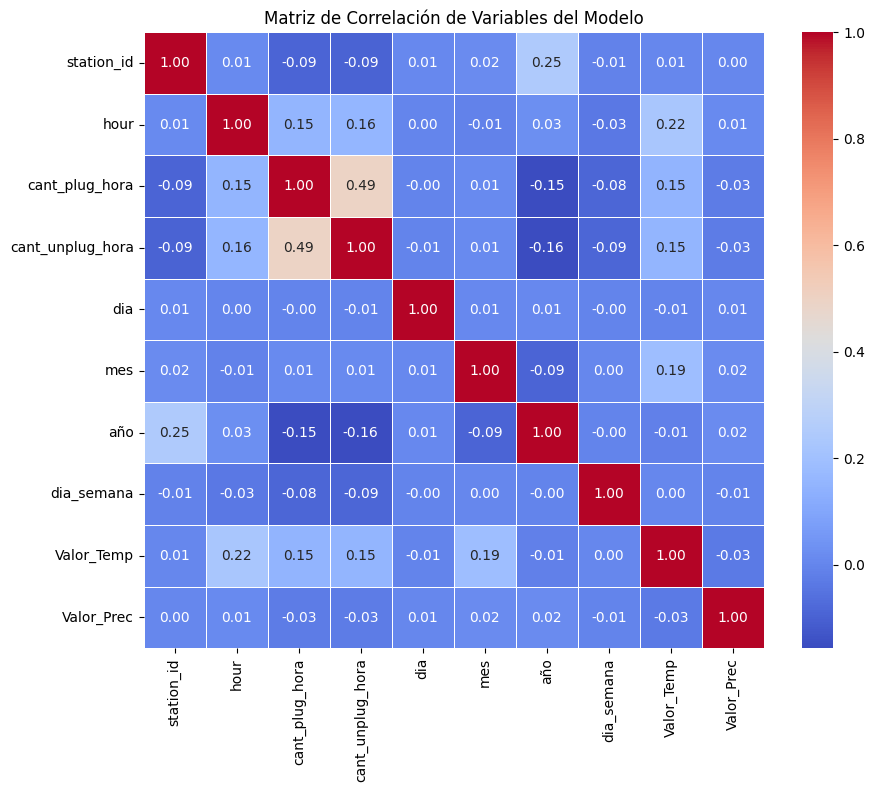


--- Matriz de Correlación ---
                  station_id      hour  cant_plug_hora  cant_unplug_hora  \
station_id          1.000000  0.014841       -0.092586         -0.094885   
hour                0.014841  1.000000        0.154019          0.156467   
cant_plug_hora     -0.092586  0.154019        1.000000          0.494884   
cant_unplug_hora   -0.094885  0.156467        0.494884          1.000000   
dia                 0.007551  0.001419       -0.004934         -0.005018   
mes                 0.019066 -0.010204        0.012233          0.012506   
año                 0.247302  0.027748       -0.154112         -0.156575   
dia_semana         -0.008311 -0.034891       -0.084682         -0.086072   
Valor_Temp          0.005998  0.223143        0.149832          0.153813   
Valor_Prec          0.003737  0.013960       -0.027298         -0.027472   

                       dia       mes       año  dia_semana  Valor_Temp  \
station_id        0.007551  0.019066  0.247302   -0.008311

In [ ]:
# Definir las columnas relevantes para el modelo (tanto características como objetivos)
variables_modelo = [ 'station_id', 'hour', 'cant_plug_hora', 'cant_unplug_hora', 'dia', 'mes', 'año', 'dia_semana', 'Valor_Temp', 'Valor_Prec'
]

# y que sean numéricas.
df_modelo_numerico = basedatos_df[variables_modelo].select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = df_modelo_numerico.corr()

# --- Visualización de la matriz de correlación (heatmap) ---
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables del Modelo')
plt.show()

# --- Imprimir la matriz de correlación (en texto) ---
print("\n--- Matriz de Correlación ---")
print(matriz_correlacion)

In [ ]:
basedatos_df.to_csv("basedatos_modelo_final.csv", encoding='utf-8', sep=';', index=False)

# Save the final DataFrame to a CSV file
#df_usos_bicimad.to_csv('final_df_filtrado.csv', index=False, sep=';', encoding='utf-8-sig')